<a href="https://colab.research.google.com/github/Prabhu-Tejas/ML_projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Titanic:

Titanic, during voyage on April 15, 1912, sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. The tragedy is considered  as one of the most infamous shipwrecks in history and led to better safety guidelines for ships.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)


survival Survival (0 = No; 1 = Yes)


name Name


sex Sex


age Age


sibsp Number of Siblings/Spouses Aboard


parch Number of Parents/Children Aboard

ticket Ticket Number


fare Passenger Fare (British pound)


cabin Cabin


embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


boat Lifeboat


body Body Identification Number


home.dest Home/Destination

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dropping 4 columns because name, passenger ID cabin and ticket no is irrelevant to survival chance.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

It can be observed that some data are missing in age, fare, cabin, embark, we need to fill the missing data.

Age - missing data is filled with mean of age.

Embarked - missig data is filled with mode of rest of the data.

Fare - missing data is filled with median of rest of the data

In [9]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [10]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [11]:
df["Fare"].fillna(df["Fare"].median(), inplace=True)

In [12]:
drop_columns = ['Cabin', 'PassengerId', 'Ticket', 'Name']


In [13]:
df=df.drop(drop_columns, axis=1)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
df['Sex']=df['Sex'].map({'female': 0, 'male': 1})

To use non numerical values in the model, we need to convert those values to numerical values. So mapping 'female': 0, 'male': 1

In [17]:
df["Embarked"]=df["Embarked"].map({'S':0,'C':1,'Q':2})

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


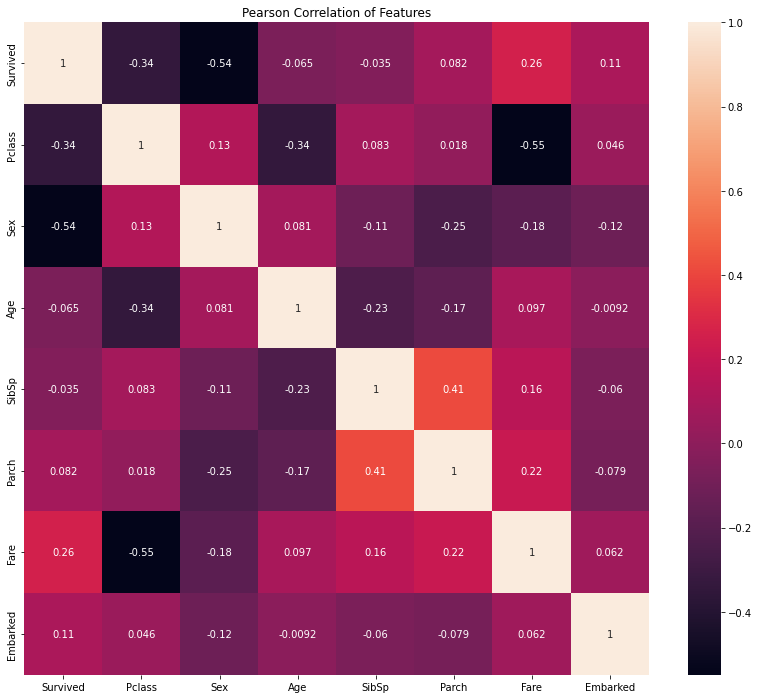

In [19]:
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features')
sns.heatmap(df.corr(), annot=True)

In [20]:
features = ['Age', 'Fare', 'Sex', 'Embarked']

AttributeError: ignored

In [21]:
x=df[features]
y=df["Survived"]

In [22]:
from sklearn import preprocessing
x =preprocessing.StandardScaler().fit_transform(x)


In [23]:
x

array([[-0.56573646, -0.50244517,  0.73769513, -0.56883712],
       [ 0.66386103,  0.78684529, -1.35557354,  1.00518113],
       [-0.25833709, -0.48885426, -1.35557354, -0.56883712],
       ...,
       [-0.1046374 , -0.17626324, -1.35557354, -0.56883712],
       [-0.25833709, -0.04438104,  0.73769513,  1.00518113],
       [ 0.20276197, -0.49237783,  0.73769513,  2.57919938]])

In [27]:
A=pd.DataFrame(x)

In [28]:
A.head()

,0,1,2,3
0,-0.565736,-0.502445,0.737695,-0.568837
1,0.663861,0.786845,-1.355574,1.005181
2,-0.258337,-0.488854,-1.355574,-0.568837
3,0.433312,0.420730,-1.355574,-0.568837
4,0.433312,-0.486337,0.737695,-0.568837


In [36]:
A.rename(columns={'0':'Age','1':'Fare','2':'Sex','3':'Embarked'},inplace=True)

In [37]:
A.head()

,0,1,2,3
0,-0.565736,-0.502445,0.737695,-0.568837
1,0.663861,0.786845,-1.355574,1.005181
2,-0.258337,-0.488854,-1.355574,-0.568837
3,0.433312,0.420730,-1.355574,-0.568837
4,0.433312,-0.486337,0.737695,-0.568837


In [38]:
A.columns=['Age', 'Fare', 'Sex', 'Embarked']

In [39]:
A.head()

,Age,Fare,Sex,Embarked
0,-0.565736,-0.502445,0.737695,-0.568837
1,0.663861,0.786845,-1.355574,1.005181
2,-0.258337,-0.488854,-1.355574,-0.568837
3,0.433312,0.420730,-1.355574,-0.568837
4,0.433312,-0.486337,0.737695,-0.568837


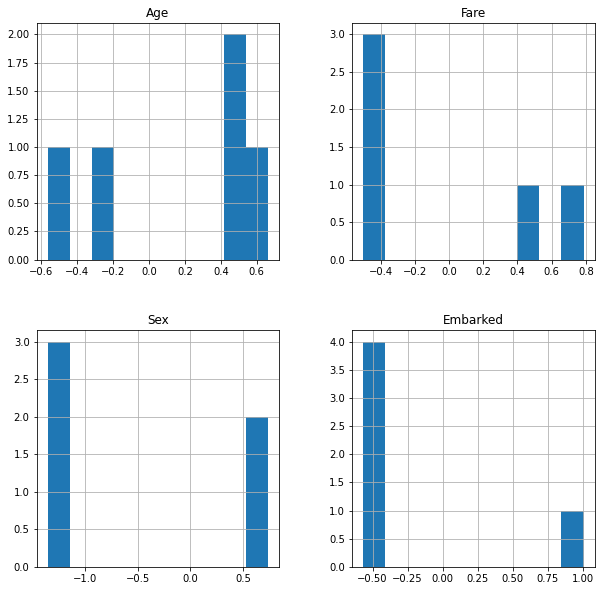

In [47]:
p=A.hist(figsize=(10,10))

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain, xtest, ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
test_scores=[]
train_scores=[]

for i in range(1,40):
    knn=KNeighborsClassifier(i)
    knn.fit(xtrain,ytrain)
    
    train_scores.append(knn.score(xtrain,ytrain))
    test_scores.append(knn.score(xtest,ytest))

In [49]:
train_scores

[0.9789325842696629,
 0.8651685393258427,
 0.851123595505618,
 0.8286516853932584,
 0.8328651685393258,
 0.8230337078651685,
 0.8230337078651685,
 0.8160112359550562,
 0.8174157303370787,
 0.8117977528089888,
 0.8033707865168539,
 0.797752808988764,
 0.7907303370786517,
 0.7963483146067416,
 0.7893258426966292,
 0.7879213483146067,
 0.7879213483146067,
 0.7935393258426966,
 0.7907303370786517,
 0.7949438202247191,
 0.7935393258426966,
 0.7949438202247191,
 0.7935393258426966,
 0.7907303370786517,
 0.7935393258426966,
 0.7879213483146067,
 0.7837078651685393,
 0.7823033707865169,
 0.7865168539325843,
 0.7808988764044944,
 0.7865168539325843,
 0.7837078651685393,
 0.7865168539325843,
 0.7865168539325843,
 0.7865168539325843,
 0.7865168539325843,
 0.7865168539325843,
 0.7851123595505618,
 0.7851123595505618]

In [50]:
test_scores

[0.7374301675977654,
 0.7597765363128491,
 0.770949720670391,
 0.7206703910614525,
 0.7318435754189944,
 0.7374301675977654,
 0.7318435754189944,
 0.7597765363128491,
 0.7541899441340782,
 0.7653631284916201,
 0.7486033519553073,
 0.7597765363128491,
 0.7430167597765364,
 0.7486033519553073,
 0.7430167597765364,
 0.7486033519553073,
 0.7486033519553073,
 0.7541899441340782,
 0.7653631284916201,
 0.7486033519553073,
 0.7653631284916201,
 0.7653631284916201,
 0.7653631284916201,
 0.776536312849162,
 0.7821229050279329,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162,
 0.776536312849162]

In [51]:
max(test_scores)

0.7821229050279329

In [65]:
max_test_score=max(test_scores)

list(enumerate(test_scores))
for i,m in enumerate(test_scores):
  if m==max_test_score:
    print(i+1,m)

25 0.7821229050279329


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


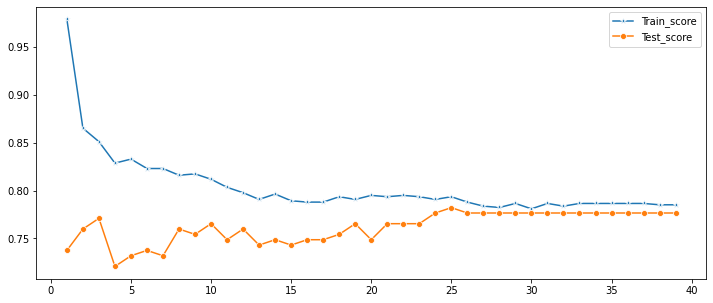

In [84]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,40),train_scores,marker='*',label='Train_score')
p=sns.lineplot(range(1,40),test_scores,marker='o',label='Test_score')

In [85]:
knn=KNeighborsClassifier(25)
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

0.7821229050279329

In [86]:
from sklearn.metrics import confusion_matrix
ypred=knn.predict(xtest)
confusion_matrix(ytest,ypred)

array([[85, 24],
       [15, 55]])

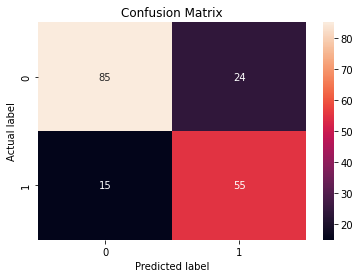

In [87]:
cnf_matrix=confusion_matrix(ytest,ypred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [88]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.70      0.79      0.74        70

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,ypred)

0.7827653997378767